<a href="https://colab.research.google.com/github/nitinlodhi019/Machine-Learning/blob/main/Data-Analysis/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API to Pandas Dataframe|Data Gathering

# Web Scaping| Creating a dataset using web scaping

# Creating dataset from MYSQL database

# Exploratry Data Analysis(EDA)


*  Model Building
*  Analysis and reporting
*  validate assumptions
*  handling missing values
*  feature engineering
*  detecting outliers





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# columns types
# 1. numerical-> passengeId, age, fare
# 2. categorical-> survived, pclass, sex, sibsp, parch, embarked
# 3. mixed-> ticket, cabin

# Univariate analysis on Nummerical column(steps)
*  descriptive statistics
*  visualization
*  identyfing outliers
*  skewness
*  conclusion





###Age
**conclusion**
* age is normally distributed
* 20% of the values are missing
* there are some outliers

In [ ]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Frequency'>

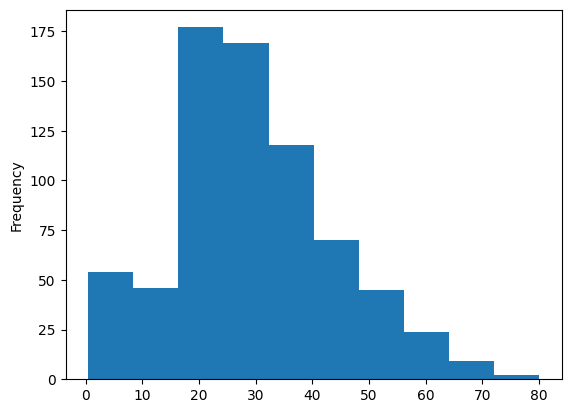

In [ ]:
df['Age'].plot(kind='hist')

<Axes: ylabel='Density'>

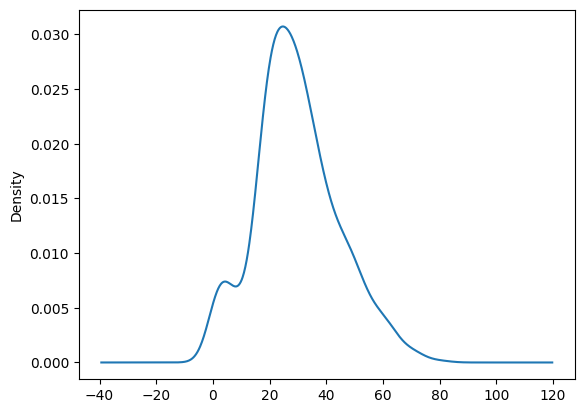

In [ ]:
df['Age'].plot(kind='kde')

In [ ]:
# when skewnees is around 0 then its a good normal distribution symbols
df['Age'].skew()

0.38910778230082704

<Axes: >

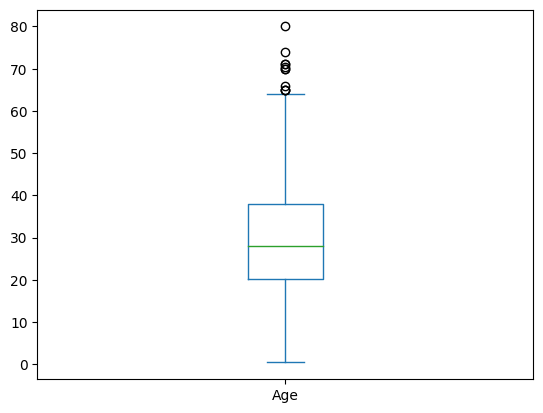

In [ ]:
df['Age'].plot(kind='box')

In [ ]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
# missing values
df['Age'].isnull().sum()

177

In [ ]:
df['Age'].isnull().sum()/ len(df['Age'])

0.19865319865319866

###Fare
**conclusion**
* The data is highly(positive) skewed
* fare column actually the group fare and not the indivisual fare(this might be an issue)
*  we need to create a individual fare

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

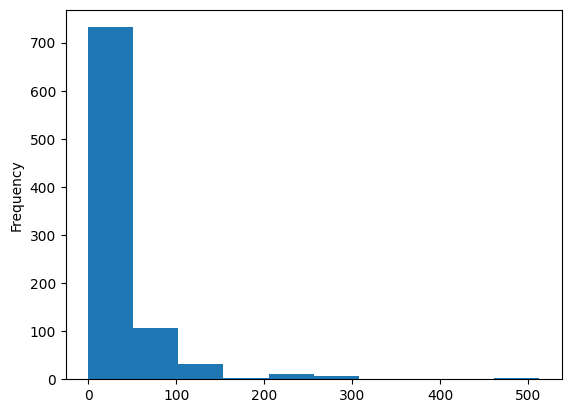

In [ ]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

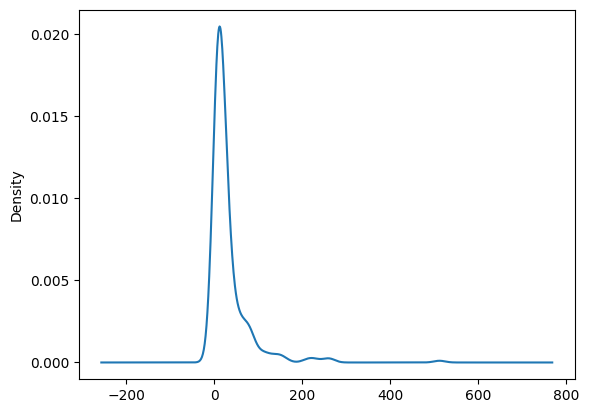

In [ ]:
df['Fare'].plot(kind='kde')

In [ ]:
# high skewness
df['Fare'].skew()

4.787316519674893

<Axes: >

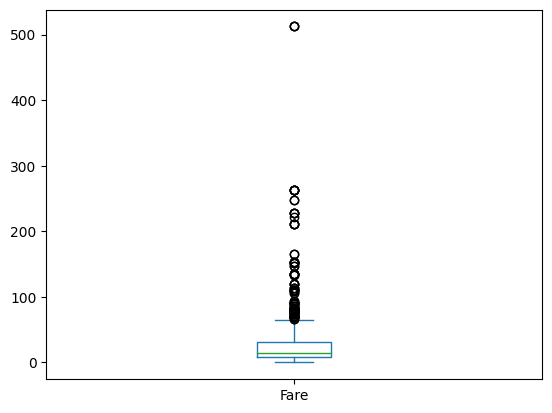

In [ ]:
df['Fare'].plot(kind='box')

In [ ]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
df['Fare'].isnull().sum()

0

# Univariate analysis on categorical columns

* descriptive statistics
* visualization
* missing value
* conclusion

### Survived
**conclusion**

In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

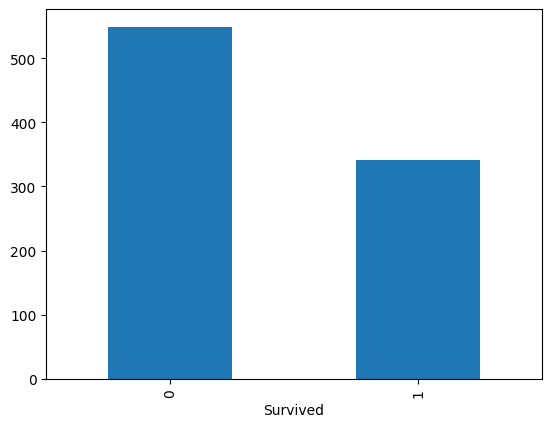

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

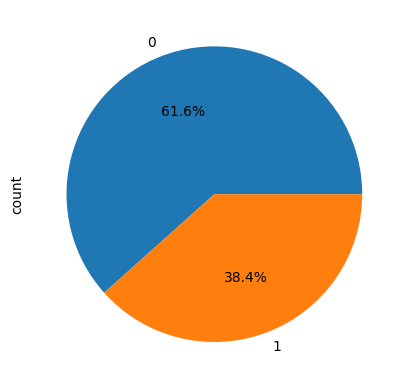

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Survived'].isnull().sum()

0

### Pclass
**conclusion**
* In class1, more than people travel class2

In [ ]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

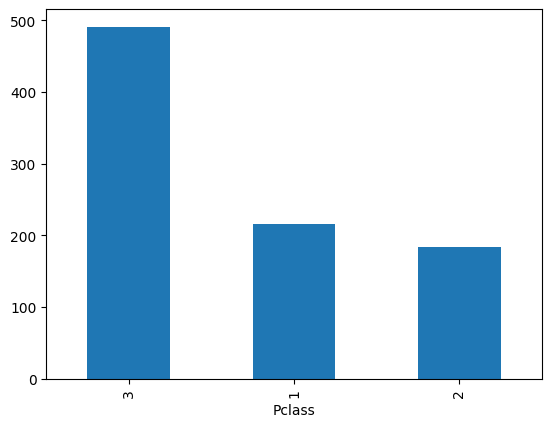

In [ ]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

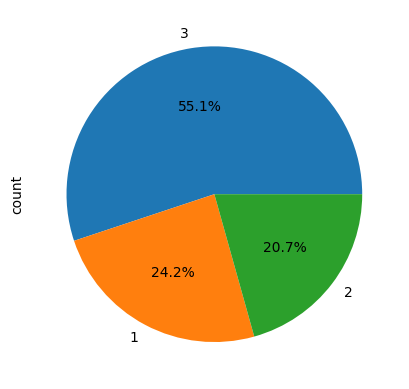

In [ ]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Sex
**conclusion**

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

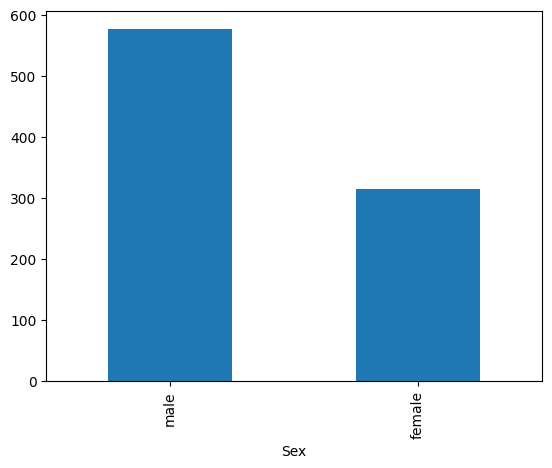

In [ ]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

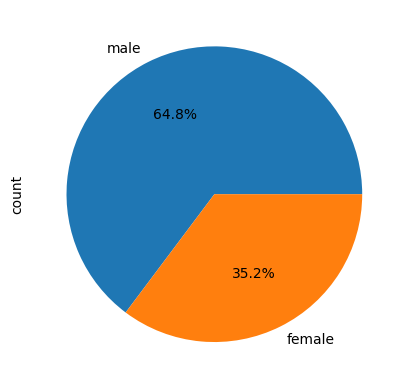

In [ ]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Sex'].isnull().sum()

0

### SibSp(family membrs/siblings)
**conclusion**
* PArch and SibSp cols can be merged to form a new coll family soze
* create a new col called is_alone

In [ ]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

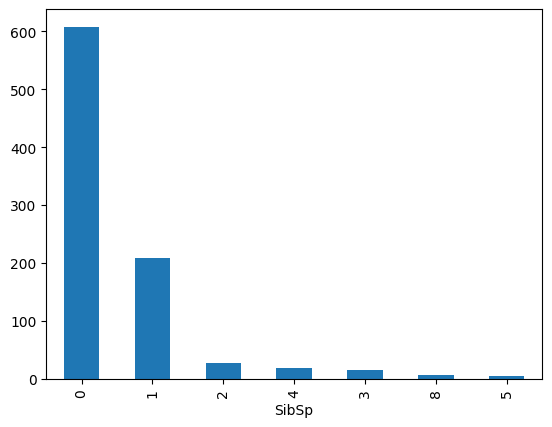

In [ ]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

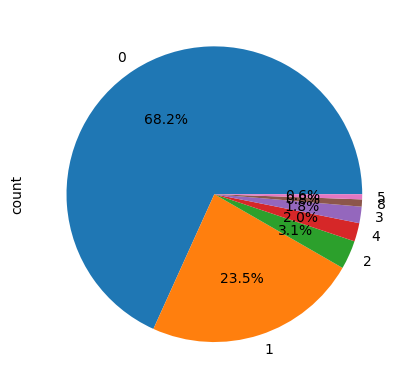

In [ ]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Embarked
**conclusion**

In [ ]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

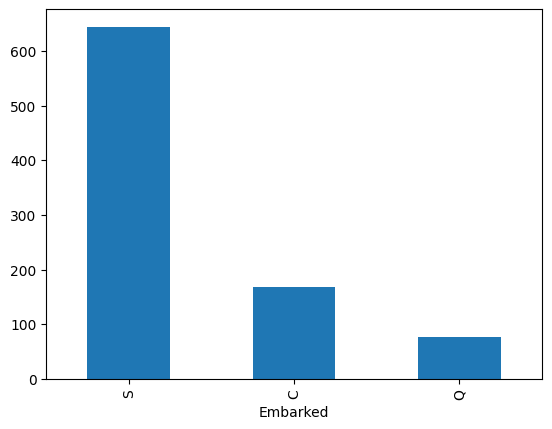

In [ ]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

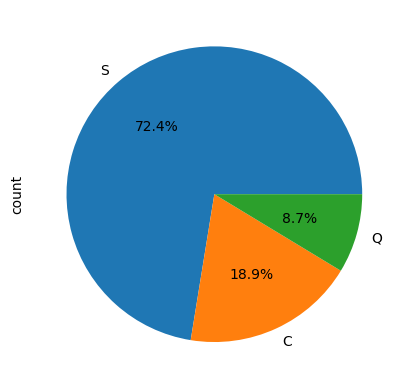

In [ ]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

# Bivariate Analysis
* Select 2 columns
    1. Numerical- Numerical
    2. Numerical- Categorical
    3. Categorical- Categorical

### Survived-Pclass
**conclusion**

In [ ]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

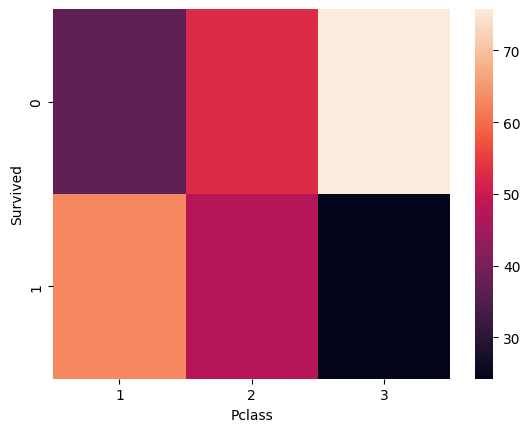

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

### Survived- Sex
**conclusion**

In [ ]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


### Survived- Embarked

In [ ]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [ ]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


### Survived-Age

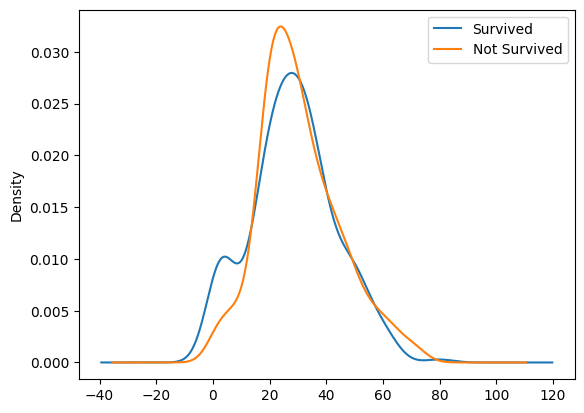

In [ ]:
df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label='Not Survived')
plt.legend()
plt.show()

In [ ]:
df[df['Pclass']==1]['Age'].mean()

38.233440860215055

# Feature Engineering

###Fare
* it's not a indidvidual fare, it's a family fare
* so we create a new column which is represent individual fare

In [ ]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [ ]:
df[df['SibSp']==8]
# here we can see that total number of the member is 10+1(SibSp+Parch+itself) in family but here only show 7
# so for this reason we read secoond file(test file)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df1=pd.read_csv('/content/test.csv')

In [ ]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df=pd.concat([df,df1])

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# now the total number of the member in a family is 11
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [ ]:
# create a new column
df['individual_fare']=df['Fare']/(df['SibSp']+df['Parch']+1)

In [ ]:
df['individual_fare']

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: individual_fare, Length: 1309, dtype: float64

In [ ]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000


### SibSp+Parch=Family_size

In [ ]:
df['family_size']=df['SibSp']+df['Parch']+1

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


In [ ]:
# family_type
# 1-> Alone
# 2-4-> Small family
#  >5 ->large

def transform_family_size(num):
  if num==1:
    return 'alone'
  elif num>1 and num <5:
    return 'small'
  else:
    return 'large'

In [ ]:
df['family_type']=df['family_size'].apply(transform_family_size)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [ ]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')

family_type,alone,large,small
Survived,,,
0.0,0.696462,0.83871,0.421233
1.0,0.303538,0.16129,0.578767


# Pandas Profiling


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# download output.html file for visit